In [0]:
#Importing all the libraries and packages

import os
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Scikit-Learn Packages
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
#Reading the train and test files
train_data = pd.read_csv('/content/drive/My Drive/Project3_Data/counterfeit_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Project3_Data/counterfeit_test.csv')

In [5]:
train_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [7]:
print("train_data_dimensions = {}, test_data_dimensions = {}".format(train_data.shape, test_data.shape))

train_data_dimensions = (6818, 12), test_data_dimensions = (1705, 11)


In [10]:
train_data.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
data                      0
dtype: int64


Only one column has Nan values

In [0]:
#Equalizing the columns of train and test files

train_data['data'] = 'train'
test_data['data'] = 'test'
test_data['Counterfeit_Sales'] = np.nan

In [0]:
file = pd.concat([train_data, test_data], axis=0)

In [13]:
file.shape

(8523, 13)

In [14]:
file.columns

Index(['Active_Since', 'Area_City_Type', 'Area_Type', 'Area_dist_level',
       'Availability_rating', 'Counterfeit_Sales', 'Counterfeit_Weight',
       'DistArea_ID', 'Medicine_ID', 'Medicine_MRP', 'Medicine_Type',
       'SidEffect_Level', 'data'],
      dtype='object')

In [15]:
file.dtypes

Active_Since             int64
Area_City_Type          object
Area_Type               object
Area_dist_level         object
Availability_rating    float64
Counterfeit_Sales      float64
Counterfeit_Weight     float64
DistArea_ID             object
Medicine_ID             object
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
data                    object
dtype: object

In [16]:
#Check for empty or NaN values
file.isnull().sum()
#Column Counterfeit_Weight has NaN values

Active_Since              0
Area_City_Type            0
Area_Type                 0
Area_dist_level           0
Availability_rating       0
Counterfeit_Sales      1705
Counterfeit_Weight     1463
DistArea_ID               0
Medicine_ID               0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
data                      0
dtype: int64

In [48]:
#Replacing NaNs with mean of the column

def fill_empty(file):
    file.fillna(value = file.mean(), inplace = True)
    return file.isnull().sum()

fill_empty(file)
fill_empty(train_data)

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
data                   0
dtype: int64

# Exploratory Data Analysis

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            6818 non-null object
Counterfeit_Weight     6818 non-null float64
DistArea_ID            6818 non-null object
Active_Since           6818 non-null int64
Medicine_MRP           6818 non-null float64
Medicine_Type          6818 non-null object
SidEffect_Level        6818 non-null object
Availability_rating    6818 non-null float64
Area_Type              6818 non-null object
Area_City_Type         6818 non-null object
Area_dist_level        6818 non-null object
Counterfeit_Sales      6818 non-null float64
data                   6818 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 692.6+ KB


In [36]:
pd.crosstab(index=train_data.Area_Type, columns='Average', \
            values=train_data.Counterfeit_Sales, aggfunc='mean')

col_0,Average
Area_Type,
CityLimits,3772.254917
DownTown,2421.278379
Industrial,2106.573248
MidTownResidential,447.847065


The Area_Type MidTownResidential have low counterfeit sales

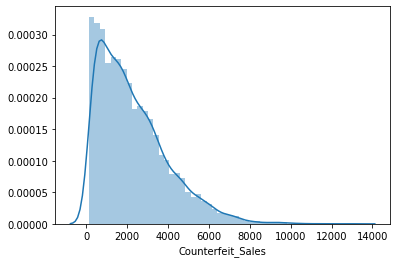

In [19]:
sns.distplot(a=train_data['Counterfeit_Sales'], bins=50)

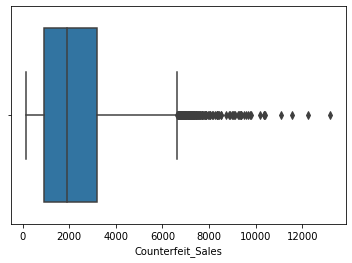

In [20]:
sns.boxplot(train_data['Counterfeit_Sales'])

Checking for linearity

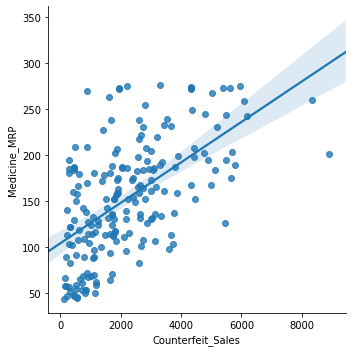

In [21]:
sns.lmplot(x='Counterfeit_Sales', y='Medicine_MRP', data=train_data.sample(n=200))

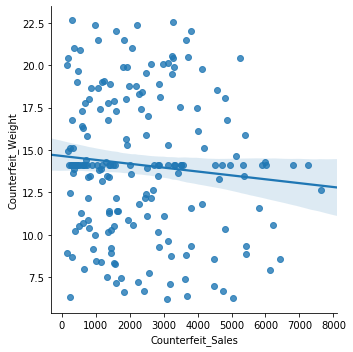

In [0]:

sns.lmplot(x='Counterfeit_Sales', y='Counterfeit_Weight', data=train_data.sample(n=200))

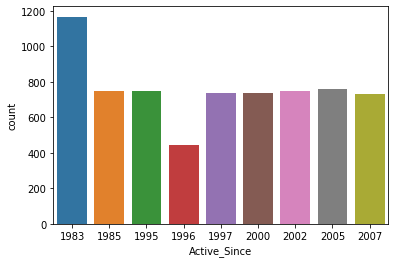

In [0]:
sns.countplot(x=train_data['Active_Since'])

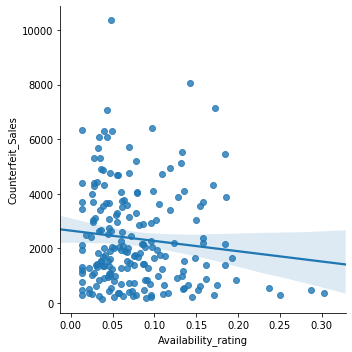

In [0]:
sns.lmplot(x='Availability_rating', y='Counterfeit_Sales', data=train_data.sample(n=200))

In [0]:
group = train_data.groupby('Active_Since')
x = group['Counterfeit_Sales'].agg(np.mean)
print(x)

Active_Since
1983    2544.127016
1985    2407.024123
1995    2358.722955
1996     445.985861
1997    2442.677445
2000    2310.996675
2002    2529.951912
2005    2476.010053
2007    2106.573248
Name: Counterfeit_Sales, dtype: float64


Year 1996 has the lowest, and Year 1983 has the highest Counterfeit Sales

In [0]:
group = train_data.groupby('Medicine_Type')
x = group['Counterfeit_Sales'].agg(np.mean)
y = group['Medicine_MRP'].agg(np.mean)
print(x)
print(y)

Medicine_Type
Analgesics            2091.241418
Antacids              2259.878564
Antibiotics           2397.201930
Antifungal            2444.055773
Antimalarial          2192.684238
Antipyretics          2292.723616
Antiseptics           2366.593219
Antiviral             2583.158763
Cardiac               2362.983092
Hreplacements         2376.118324
Mstablizers           2044.869218
MuscleRelaxants       2091.091800
OralContraceptives    2245.216825
Statins               2309.446292
Stimulants            2279.968747
Tranquilizers         2084.449652
Name: Counterfeit_Sales, dtype: float64
Medicine_Type
Analgesics            141.348362
Antacids              150.480346
Antibiotics           155.363720
Antifungal            155.506894
Antimalarial          149.767646
Antipyretics          157.918365
Antiseptics           158.799348
Antiviral             149.864241
Cardiac               150.613139
Hreplacements         156.753161
Mstablizers           136.936503
MuscleRelaxants       144

[Text(0, 0, 'Antimalarial'),
 Text(0, 0, 'Mstablizers'),
 Text(0, 0, 'Cardiac'),
 Text(0, 0, 'OralContraceptives'),
 Text(0, 0, 'Hreplacements'),
 Text(0, 0, 'Antiseptics'),
 Text(0, 0, 'Statins'),
 Text(0, 0, 'Analgesics'),
 Text(0, 0, 'MuscleRelaxants'),
 Text(0, 0, 'Antibiotics'),
 Text(0, 0, 'Antifungal'),
 Text(0, 0, 'Antiviral'),
 Text(0, 0, 'Tranquilizers'),
 Text(0, 0, 'Antacids'),
 Text(0, 0, 'Antipyretics'),
 Text(0, 0, 'Stimulants')]

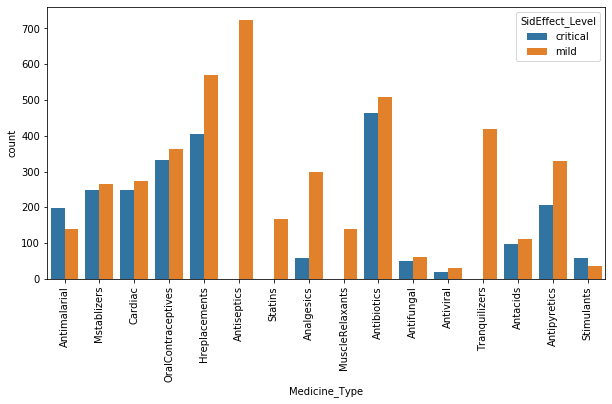

In [0]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Medicine_Type', hue='SidEffect_Level', data=train_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [0]:
pd.crosstab(index=train_data['Medicine_Type'], columns=train_data['SidEffect_Level'], normalize='index').round(2)

SidEffect_Level,critical,mild
Medicine_Type,,
Analgesics,0.16,0.84
Antacids,0.47,0.53
Antibiotics,0.48,0.52
Antifungal,0.44,0.56
Antimalarial,0.59,0.41
Antipyretics,0.38,0.62
Antiseptics,0.00,1.00
Antiviral,0.41,0.59
Cardiac,0.48,0.52


Tranquilizers, MuscleRelaxants, Antiseptics, Statins do not have severe side-effect

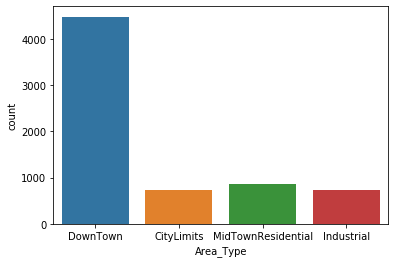

In [0]:
sns.countplot(train_data['Area_Type'])

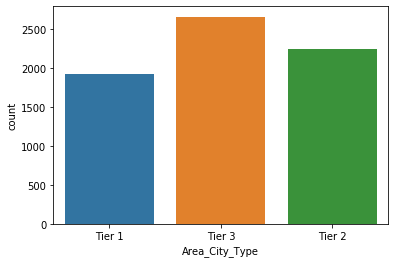

In [0]:
sns.countplot(train_data['Area_City_Type'])

In [0]:
group = train_data.groupby('Area_dist_level')
x = group['Counterfeit_Sales'].agg(np.mean)
y = group['Medicine_MRP'].agg(np.mean)
print(x)
print(y)

Area_dist_level
High       2407.024123
Medium     2775.051246
Small      1998.408849
Unknown    1950.354460
Name: Counterfeit_Sales, dtype: float64
Area_dist_level
High       153.417128
Medium     151.120029
Small      151.564248
Unknown    150.780613
Name: Medicine_MRP, dtype: float64


District Level = High,  have MRP Price High

In [0]:
#Dropping unnecessary features
file.drop(columns=['Medicine_ID'], inplace=True, axis=1)

In [50]:
file.columns

Index(['Active_Since', 'Area_City_Type', 'Area_Type', 'Area_dist_level',
       'Availability_rating', 'Counterfeit_Sales', 'Counterfeit_Weight',
       'DistArea_ID', 'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'data'],
      dtype='object')

In [51]:
#Dealing with Categorical Features

cat_cols = file.select_dtypes(include='object').columns[:-1]
print(cat_cols)

Index(['Area_City_Type', 'Area_Type', 'Area_dist_level', 'DistArea_ID',
       'Medicine_Type', 'SidEffect_Level'],
      dtype='object')


In [0]:
#Custom create_dummies function
def Create_Dummies(file,cat_cols):
    for col in cat_cols:
        freqs=file[col].value_counts()
        k=freqs.index[freqs>50][:-1]
        for cat in k:
            name=col+'_'+cat
            file[name]=(file[col]==cat).astype(int)
        del file[col]
        print(col)

In [53]:
Create_Dummies(file,cat_cols)

Area_City_Type
Area_Type
Area_dist_level
DistArea_ID
Medicine_Type
SidEffect_Level


In [54]:
file.shape

(8523, 39)

In [55]:
file.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_MRP,data,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_dist_level_Medium,Area_dist_level_Unknown,Area_dist_level_Small,DistArea_ID_Area027,DistArea_ID_Area013,DistArea_ID_Area049,DistArea_ID_Area046,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area018,DistArea_ID_Area017,DistArea_ID_Area010,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants,SidEffect_Level_mild
0,1995,0.070422,1775.5026,13.100000,160.2366,train,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1983,0.013000,3069.1520,14.157645,110.4384,train,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1995,0.060783,2603.0920,9.025000,259.4092,train,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1995,0.065555,1101.7130,11.800000,99.9830,train,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1983,0.248859,158.9402,14.157645,56.4402,train,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
#Seperating train and test data

train_file = file[file['data'] == 'train']


test_file = file[file['data'] == 'test']


#Dropping additional Columns

train_file.drop(columns='data', axis=1, inplace=True)
test_file.drop(columns=['data', 'Counterfeit_Sales'], axis=1, inplace = True)

print(train_file.shape)
print(test_file.shape)

(6818, 38)
(1705, 37)


In [57]:
#split datset into 80% training and 20% test for validation

training_data, validation_data = train_test_split(train_file,test_size=0.2,random_state=10)
print(training_data.shape)
print(validation_data.shape)

(5454, 38)
(1364, 38)


In [0]:
#Getting the files to fit the model

xtrain = training_data.drop('Counterfeit_Sales', axis=1)
ytrain = training_data['Counterfeit_Sales']



In [18]:
#Custom class to implement a regression model

class rg_model():
    
    def __init__(self, clf, features, target):
        
        '''Initialize the model and data'''
        
        self.clf = clf
        self.features = features
        self.target = target
    
    def fit_model(self):
        
        '''This function fits the and returns the fitted model'''
        
        return self.clf.fit(self.features, self.target)
    
    def grid_search(self,params,cv,metric):
        
        '''This function implements GridSearchCV and returns the best estimator'''
        
        grid_search=GridSearchCV(self.clf,param_grid=params,cv=cv,scoring=metric,verbose=1)
        grid_search=grid_search.fit(self.features, self.target)
        return grid_search.best_estimator_

    def make_predictions(self,fitted_model,test):
        
        '''
        This function returns the predictions
        Parameters:
        
        # fitted_model : trained model
        # test : testing data for making predictions
        '''
        
        return fitted_model.predict(test)

    def evaluate_model_performance(self,predicted_values):
        
        '''This function returns the mean absolute error value
        Parameters:
        
        # predicted_values needs to be sent as a parameter
        '''
        mae = mean_absolute_error(validation_data['Counterfeit_Sales'],predicted_values)
        return 'MEAN ABSOLUTE ERROR is {}'.format(mae)


# Linear Regression

In [ ]:
#Create an object
model = rg_model(LinearRegression(),xtrain,ytrain)

In [83]:
lm = model.fit_model()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted_values = model.make_predictions(lm, validation_data.drop('Counterfeit_Sales', axis=1))

In [85]:
model.evaluate_model_performance(predicted_values)

'MEAN ABSOLUTE ERROR is 814.9841542841501'

# Ridge Regression

In [0]:
#lambdas=np.linspace(1,100,100)
lambdas=np.linspace(88,89,10)

In [0]:
params={'alpha':lambdas}

In [0]:
ridge_model = rg_model(Ridge(fit_intercept=True), xtrain, ytrain)

In [105]:
model =  ridge_model.grid_search(params,10,'neg_mean_absolute_error')
model

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


Ridge(alpha=89.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
predicted_values = ridge_model.make_predictions(model,validation_data.drop('Counterfeit_Sales', axis=1))

In [108]:
ridge_model.evaluate_model_performance(predicted_values)

'MEAN ABSOLUTE ERROR is 812.7648862959611'

# Lasso Regression

In [0]:
#lambdas=np.linspace(1,100,100)
lambdas=np.linspace(11,12,100)
params={'alpha':lambdas}

In [0]:
lasso_model = rg_model(Lasso(fit_intercept=True), xtrain, ytrain)

In [121]:
model = lasso_model.grid_search(params=params,cv=10,metric='neg_mean_absolute_error')
model

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.0s finished


Lasso(alpha=11.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted_values=lasso_model.make_predictions(model, validation_data.drop('Counterfeit_Sales', axis=1))

In [123]:
lasso_model.evaluate_model_performance(predicted_values)

'MEAN ABSOLUTE ERROR is 808.9139069064713'

# Random Forest Regressor

In [124]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [126]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=10)

# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  34.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.4s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  34.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  34.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  33.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  33.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [127]:
rf_random.best_params_

#{'bootstrap': False,
#'max_depth': 90,
#'max_features': 'sqrt',
#'min_samples_leaf': 4,
#'min_samples_split': 10,
#'n_estimators': 600}

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [0]:
#Tuning new parameters

new_random_grid = {'bootstrap': [True, False],
 'max_depth': [90, 85, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [10,20],
 'min_samples_split': [20,30],
 'n_estimators': [620,650,700]}

In [0]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = new_random_grid, n_iter = 10, cv = 5, verbose=2, random_state=10)

In [130]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False, total=  11.7s
[CV] n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False, total=  11.5s
[CV] n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False 
[CV]  n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False, total=  11.6s
[CV] n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False 
[CV]  n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False, total=  11.8s
[CV] n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False 
[CV]  n_estimators=620, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=85, bootstrap=False, total=  11.6s
[CV] n_estimators=620, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [131]:
rf_random.best_params_

#{'bootstrap': True,'max_depth': 100,'max_features': 'auto','min_samples_leaf': 20,'min_samples_split': 30,'n_estimators': 650}

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'n_estimators': 650}

In [0]:
#Running RandomForestRegressor with best parameters
rf = RandomForestRegressor(n_estimators=650, bootstrap=True, max_depth=90, max_features='auto', min_samples_leaf=20, min_samples_split=30)

In [134]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=650, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

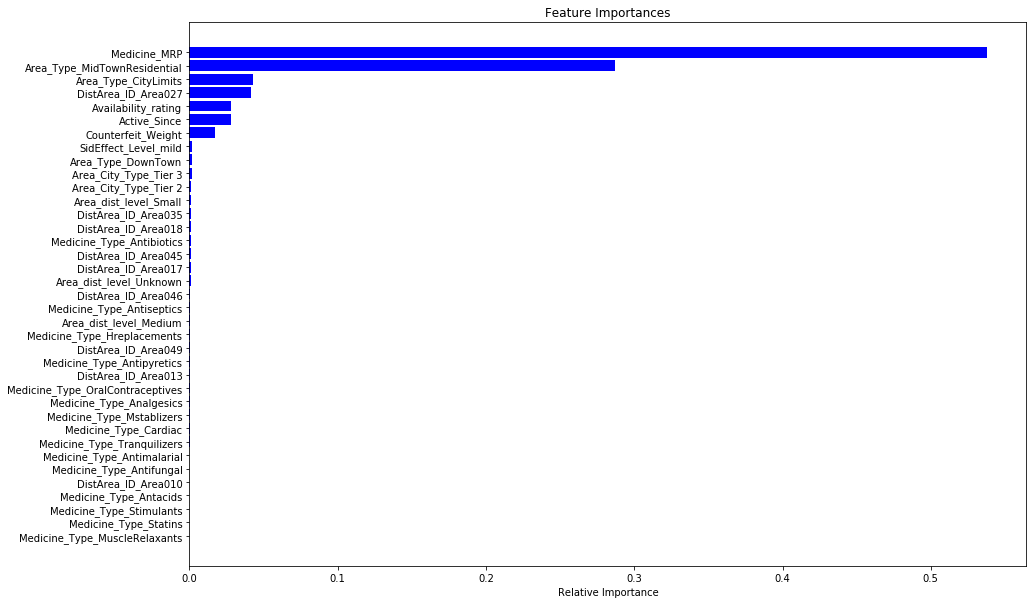

In [150]:
features = xtrain.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
pred = rf.predict(validation_data.drop('Counterfeit_Sales', axis=1))

In [141]:
mean_absolute_error(validation_data['Counterfeit_Sales'],pred

741.0065065995029

RandomForestRegressor performs well, but still it can be tuned further or maybe boosting algorithms can be used

In [142]:
#Running the model on entire train_file

xtrain1 = train_file.drop('Counterfeit_Sales', axis=1)
ytrain2 = train_file['Counterfeit_Sales']

rf.fit(xtrain1,ytrain2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=650, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predicted_values = rf.predict(test_file)

In [144]:
predicted_values[0:5]

array([2196.29966772, 3672.84827158, 1683.11008401,  353.44411281,
        375.50788101])

In [0]:
#Submission File
pd.DataFrame(predicted_values).to_csv("mysubmission.csv",index=False)